## Exploratory Data Analysis

The chest x-ray image data can be downloaded from [kaggle](https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia?resource=download). As explained on the aforementioned kaggle site, the  dataset consists of a total of `5'863` x-ray images whose labels were generated by two expert physicians after unreadable and low-quality x-ray scans have been removed.

## Packages and Presets

In [16]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(style="whitegrid")
import matplotlib.pyplot as plt
import os
from typing import Tuple
# opencv for image processing
import cv2
import tqdm
%load_ext blackcellmagic

## Reading in the Data

First, we have to read in the data using the function we wrote below. Note, that in the original dataset there are three labels: "Normal", "Bacterial Pneumonia" and "Viral Pneumonia". Thus, our read_image function provides the option to consider all three labels or to merge the last two labels into one. For the EDA we will consider both options (i.e. three labels and two labels), in the questions thereafter we will however only consider a binary classification problem (i.e. two labels).

In [54]:
def get_data(
    folder_path: str,
    pneumonia_subgroup: bool = False,
    img_size: Tuple[int, int] = (256, 256)
) -> Tuple[np.ndarray, np.ndarray]:

    """Reads the images and labels from the folder

    Args:
        folder_path (str): Path to the folder containing train/val/test images
        pneumonia_subgroup (bool, optional): Whether the different pneumonia types
                    should get different labels. Defaults to False.
        img_size (Tuple[int, int], optional): Rescaled size of images. Defaults to (256, 256).

    Returns:
        Tuple[np.ndarray, np.ndarray]: A tuple of the images as np.ndarray
                    and the labels as np.ndarray
    """
    images = []
    labels = []
    
    for i, subfolder in enumerate(["NORMAL", "PNEUMONIA"]):
        for file in tqdm.tqdm(
            os.listdir(os.path.join(folder_path, subfolder)),
            desc=f"Reading {subfolder} {folder_path.split('/')[-1]} images",
        ):

            # read in images in grayscale foramt
            image_gray = cv2.imread(
                os.path.join(folder_path, subfolder, file), cv2.IMREAD_GRAYSCALE
            )
            # resize images to the same size
            image_resized = cv2.resize(image_gray, img_size)
            images.append(image_resized)
            
            # if pneumonia_subgroup is True, we want to differentiate between
            # bacterial and viral pneumonia in the labels
            if pneumonia_subgroup and subfolder == "PNEUMONIA":
                if "bacteria" in file:
                    labels.append(i)
                else:
                    labels.append(i + 1)

            else:
                labels.append(i)
                
    return np.array(images), np.array(labels)

In [61]:
# train/validation images and 3 labels
train_images_all_types, train_labels_all_types = get_data(
    "data/chest_xray/train", pneumonia_subgroup=True
)
val_images_all_types, val_labels_all_types = get_data(
    "data/chest_xray/val", pneumonia_subgroup=True
)

# train/ validation images and 2 labels
train_images, train_labels = get_data("data/chest_xray/train")
val_images, val_labels = get_data("data/chest_xray/val")

Reading PNEUMONIA val images: 100%|██████████| 8/8 [00:00<00:00, 475.96it/s]


In [39]:
# explore shape of train/validation image and label arrays
print(f"Shape of train images: {train_images.shape}")
print(f"Shape of train labels: {train_labels.shape}")

print(f"Shape of val images: {val_images.shape}")
print(f"Shape of val labels: {val_labels.shape}")

Shape of train images: (5216, 256, 256)
Shape of train labels: (5216,)
Shape of val images: (16, 256, 256)
Shape of val labels: (16,)


Thus, our train dataset consists of `5'216` x-ray images, our validation set consists of `16` images and our test set consists of <span style="color: red;">  5'863-5'216-16=624???? </span> images.  Hence, due to the small size of the validation set, we should be careful to not overfit the model to the validation set.

In [57]:
np.unique(train_labels, return_counts=True)

(array([0, 1]), array([1341, 3875]))

<Axes: ylabel='count'>

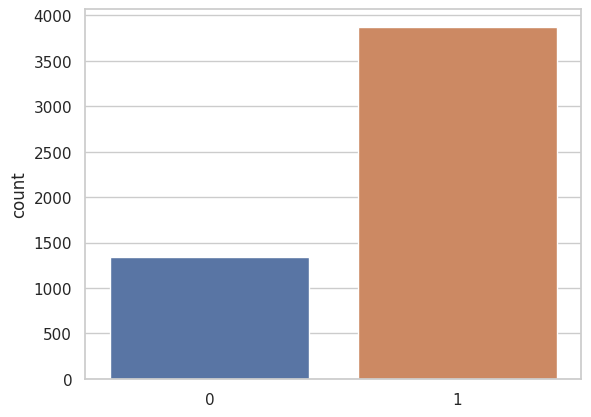

In [60]:
sns.countplot(x=train_labels)

## Visual Inspection

Let's